In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
dataset = pd.read_csv('/content/drive/MyDrive/8th Sem/Machine learning/Exp 8: Creating classification model based on Support Vector Machine/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
x = dataset.drop(['Outcome'],1)
y = dataset.Outcome

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [40]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',C=100)
model.fit(xtrain,ytrain)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
ypred=model.predict(xtest)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.7916666666666666

In [43]:
from sklearn import metrics
cm = metrics.confusion_matrix(ytest, ypred)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(33.0, 0.5, 'Actual label')

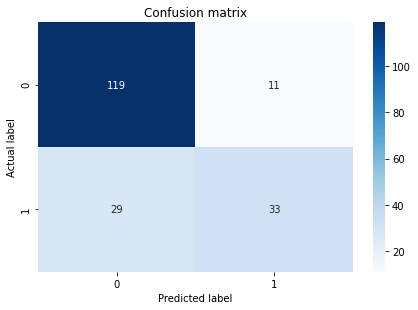

In [45]:
class_names =[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       130
           1       0.75      0.53      0.62        62

    accuracy                           0.79       192
   macro avg       0.78      0.72      0.74       192
weighted avg       0.79      0.79      0.78       192

